# Лабораторная работа: Оценка параметра методом экспертных оценок

# Вариант: 6 / Кол-во экспертов: 9


In [16]:
import math
import matplotlib.pyplot as plt


In [7]:
data1 = '6 9 87 90 77 83 87 82 81 97 97'
data2 = '6 9 10 15 14 09 07 8 10 15 12'
data3 = '6 9 22 27 33 31 23 28 31 36 30'

In [3]:
R = 4  # Точность округления

# Разбор строк и преобразование

In [5]:
per_ocenki_par = [int(i)/100 for i in data1.split(' ')[2:]]
per_koef_avtor_exs = [int(i)/100 for i in data2.split(' ')[2:]]
koef_rassogl_ocen_exs = [int(i)/100 for i in data3.split(' ')[2:]]

In [6]:
x = per_ocenki_par
v = per_koef_avtor_exs
k = koef_rassogl_ocen_exs

In [8]:
print("## Входные данные")
print(f"Вариант: {data1.split(' ')[0]}")
print(f"Количество экспертов: {data1.split(' ')[1]}")
print(f"\nОценки параметров: {x}")
print(f"Коэффициенты авторитета: {v}")
print(f"Коэффициенты рассогласования: {k}")

## Входные данные
Вариант: 6
Количество экспертов: 9

Оценки параметров: [0.87, 0.9, 0.77, 0.83, 0.87, 0.82, 0.81, 0.97, 0.97]
Коэффициенты авторитета: [0.1, 0.15, 0.14, 0.09, 0.07, 0.08, 0.1, 0.15, 0.12]
Коэффициенты рассогласования: [0.22, 0.27, 0.33, 0.31, 0.23, 0.28, 0.31, 0.36, 0.3]


# Расчёт уточнённых коэффициентов авторитета

In [9]:
utochn = [round(0.5 * (v[i] + (v[i] / (k[i] ** 0.5))), R) for i in range(len(v))]
print("## Уточнённые коэффициенты авторитета")
print(utochn)

## Уточнённые коэффициенты авторитета
[0.1566, 0.2193, 0.1919, 0.1258, 0.108, 0.1156, 0.1398, 0.2, 0.1695]


# Скорректированные коэффициенты авторитета


In [10]:
sum_utochn = sum(utochn)
skorek = [round(u / sum_utochn, R) for u in utochn]
print("## Скорректированные коэффициенты авторитета")
print(skorek)

## Скорректированные коэффициенты авторитета
[0.1098, 0.1537, 0.1345, 0.0882, 0.0757, 0.081, 0.098, 0.1402, 0.1188]


# Среднее арифметическое значений параметра


In [11]:
p_A1 = round(sum(x) / len(x), R)
print("## Среднее арифметическое значений параметра")
print(p_A1)

## Среднее арифметическое значений параметра
0.8678


# Аггрегация без коррекции коэффициентов


In [12]:
current_v = v.copy()
sum_ = 0

for i in range(len(x)-1):
    for j in range(i+1, len(x)):
        if current_v[i] - current_v[j] != 0:
            h_ij = ((max(current_v) - current_v[i]) /
                    (current_v[i] - current_v[j])) * (x[i] - x[j]) + x[i]
        else:
            h_ij = (x[i] + x[j]) / 2
        sum_ += h_ij if 0 < h_ij < 1 else (1 if h_ij >= 1 else 0)

p_A2 = round(2 * math.factorial(len(v) - 2) / math.factorial(len(v)) * sum_, R)
print("## Аггрегированное значение без коррекции авторитета")
print(p_A2)

## Аггрегированное значение без коррекции авторитета
0.8738


# Аггрегация с коррекцией коэффициентов


In [13]:
current_v = skorek.copy()
sum_ = 0

for i in range(len(x)-1):
    for j in range(i+1, len(x)):
        h_ij = ((max(current_v) - current_v[i]) /
                (current_v[i] - current_v[j])) * (x[i] - x[j]) + x[i]
        sum_ += h_ij if 0 < h_ij < 1 else (1 if h_ij >= 1 else 0)

p_A3 = round(2 * math.factorial(len(v) - 2) / math.factorial(len(v)) * sum_, R)
print("## Аггрегированное значение с коррекцией авторитета")
print(p_A3)

## Аггрегированное значение с коррекцией авторитета
0.8594


# Финальный анализ


In [14]:
print("## Сравнение результатов")
print(f"Среднее арифметическое (без авторитета): {p_A1}")
print(f"Аггрегация без коррекции: {p_A2}")
print(f"Аггрегация с коррекцией: {p_A3}")

## Сравнение результатов
Среднее арифметическое (без авторитета): 0.8678
Аггрегация без коррекции: 0.8738
Аггрегация с коррекцией: 0.8594


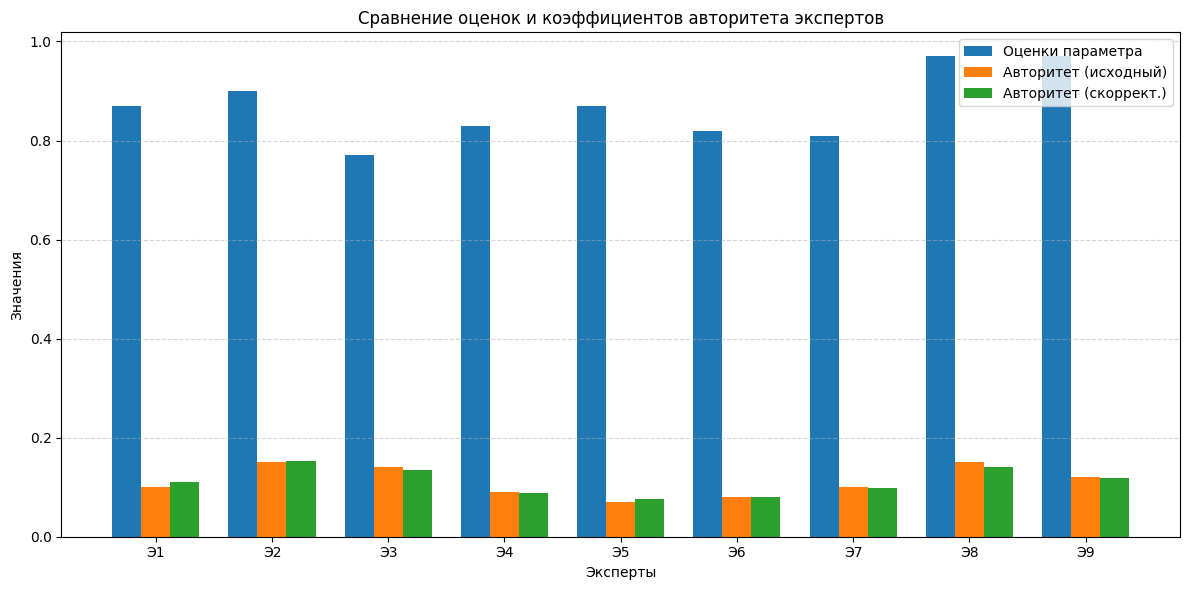

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Обозначения
experts = [f"Э{i+1}" for i in range(len(x))]
x_vals = x
v_vals = v
sk_vals = skorek

# Подготовка осей
index = np.arange(len(x))
bar_width = 0.25

# Создание графика
plt.figure(figsize=(12, 6))

plt.bar(index - bar_width, x_vals, width=bar_width, label='Оценки параметра')
plt.bar(index, v_vals, width=bar_width, label='Авторитет (исходный)')
plt.bar(index + bar_width, sk_vals, width=bar_width, label='Авторитет (скоррект.)')

plt.xticks(index, experts)
plt.xlabel("Эксперты")
plt.ylabel("Значения")
plt.title("Сравнение оценок и коэффициентов авторитета экспертов")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
